In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns
from mplsoccer import Pitch

In [18]:
pitch = Pitch( pitch_type='statsbomb')

In [2]:
df = pd.read_json('/Users/amitmishra/Downloads/Datasets/open-data-master/data/events/7444.json')

In [3]:
df.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,counterpress,interception,ball_recovery,injury_stoppage,50_50,foul_committed,foul_won,substitution,clearance,bad_behaviour
0,43a535f8-cb57-48d3-81e5-def30cfcd02c,1,1,2025-07-09 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 766, 'name': 'North Carolina Courage'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17222a84-2669-4e8f-9be0-ab4930f5764b,2,1,2025-07-09 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 766, 'name': 'North Carolina Courage'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,de653140-8a3d-4398-81b8-6dfd157c8b04,3,1,2025-07-09 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 766, 'name': 'North Carolina Courage'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78667469-0503-4b3d-a2ad-cf3453fbee03,4,1,2025-07-09 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 766, 'name': 'North Carolina Courage'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5964bf46-6176-40dc-bd1f-fef1c79efb4b,5,1,2025-07-09 00:00:03.033,0,3,"{'id': 30, 'name': 'Pass'}",2,"{'id': 761, 'name': 'Chicago Red Stars'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_norm = pd.json_normalize(df.to_dict('records'))

In [6]:
df.shape

(2862, 36)

In [7]:
for k in df_norm.columns:
    print(k)

id
index
period
timestamp
minute
second
possession
duration
related_events
player
position
location
pass
under_pressure
carry
dribble
ball_receipt
block
shot
goalkeeper
duel
counterpress
interception
ball_recovery
injury_stoppage
50_50
foul_committed
foul_won
substitution
clearance
bad_behaviour
type.id
type.name
possession_team.id
possession_team.name
play_pattern.id
play_pattern.name
team.id
team.name
tactics.formation
tactics.lineup
tactics
player.id
player.name
position.id
position.name
pass.recipient.id
pass.recipient.name
pass.length
pass.angle
pass.height.id
pass.height.name
pass.end_location
pass.body_part.id
pass.body_part.name
pass.type.id
pass.type.name
carry.end_location
dribble.outcome.id
dribble.outcome.name
pass.outcome.id
pass.outcome.name
ball_receipt.outcome.id
ball_receipt.outcome.name
block.deflection
pass.assisted_shot_id
pass.shot_assist
shot.statsbomb_xg
shot.end_location
shot.key_pass_id
shot.body_part.id
shot.body_part.name
shot.type.id
shot.type.name
shot.tech

In [48]:
df_norm['type.name'].value_counts()

type.name
Pass                 760
Ball Receipt*        704
Carry                542
Pressure             199
Ball Recovery        150
Block                 61
Clearance             60
Goal Keeper           51
Duel                  47
Shot                  45
Interception          37
Miscontrol            36
Dribble               31
Camera On             22
Dispossessed          22
Dribbled Past         21
Foul Committed        16
Foul Won              16
Injury Stoppage        8
Substitution           6
Camera off             5
Half Start             4
Half End               4
Offside                3
50/50                  2
Shield                 2
Starting XI            2
Referee Ball-Drop      2
Player On              1
Tactical Shift         1
Player Off             1
Bad Behaviour          1
Name: count, dtype: int64

In [9]:
mydf = df_norm[['minute', 'player', 'possession_team.name', 'type.name','location','pass.end_location','pass.type.name','pass.cross', 'play_pattern.name']]

In [53]:
mydf['play_pattern.name'].value_counts()

play_pattern.name
Regular Play      1554
From Throw In      610
From Free Kick     210
From Corner        159
From Goal Kick     158
From Kick Off       90
From Counter        32
From Keeper         25
Other               24
Name: count, dtype: int64

In [29]:
df_passes = mydf[(mydf['pass.cross'] == True) & (mydf['play_pattern.name'] == 'Regular Play')]

In [30]:
df_passes.head()

,minute,player,possession_team.name,type.name,location,pass.end_location,pass.type.name,pass.cross,play_pattern.name
346,9,NaN,North Carolina Courage,Pass,"[109.0, 11.0]","[108.0, 35.0]",NaN,True,Regular Play
679,20,NaN,North Carolina Courage,Pass,"[102.0, 14.0]","[108.0, 39.0]",NaN,True,Regular Play
779,23,NaN,Chicago Red Stars,Pass,"[102.0, 3.0]","[118.0, 80.0]",NaN,True,Regular Play
920,28,NaN,North Carolina Courage,Pass,"[102.0, 11.0]","[109.0, 37.0]",NaN,True,Regular Play
1222,40,NaN,North Carolina Courage,Pass,"[115.0, 17.0]","[119.0, 61.0]",NaN,True,Regular Play


In [31]:
df_passes['xstart'] = df_passes['location'].str[0]
df_passes['ystart'] = df_passes['location'].str[1]

/var/folders/85/d_fv83j92kq22pp6q4hcdzmh0000gp/T/ipykernel_92401/3341419892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passes['xstart'] = df_passes['location'].str[0]
/var/folders/85/d_fv83j92kq22pp6q4hcdzmh0000gp/T/ipykernel_92401/3341419892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passes['ystart'] = df_passes['location'].str[1]


In [32]:
df_passes['xend'] = df_passes['pass.end_location'].str[0]
df_passes['yend'] = df_passes['pass.end_location'].str[1]

/var/folders/85/d_fv83j92kq22pp6q4hcdzmh0000gp/T/ipykernel_92401/2727350464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passes['xend'] = df_passes['pass.end_location'].str[0]
/var/folders/85/d_fv83j92kq22pp6q4hcdzmh0000gp/T/ipykernel_92401/2727350464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passes['yend'] = df_passes['pass.end_location'].str[1]


In [33]:
df_passes.head()

,minute,player,possession_team.name,type.name,location,pass.end_location,pass.type.name,pass.cross,play_pattern.name,xstart,ystart,xend,yend
346,9,NaN,North Carolina Courage,Pass,"[109.0, 11.0]","[108.0, 35.0]",NaN,True,Regular Play,109.0,11.0,108.0,35.0
679,20,NaN,North Carolina Courage,Pass,"[102.0, 14.0]","[108.0, 39.0]",NaN,True,Regular Play,102.0,14.0,108.0,39.0
779,23,NaN,Chicago Red Stars,Pass,"[102.0, 3.0]","[118.0, 80.0]",NaN,True,Regular Play,102.0,3.0,118.0,80.0
920,28,NaN,North Carolina Courage,Pass,"[102.0, 11.0]","[109.0, 37.0]",NaN,True,Regular Play,102.0,11.0,109.0,37.0
1222,40,NaN,North Carolina Courage,Pass,"[115.0, 17.0]","[119.0, 61.0]",NaN,True,Regular Play,115.0,17.0,119.0,61.0


In [34]:
x_data = (df_passes['xstart'], df_passes['xend'])
y_data = (df_passes['ystart'], df_passes['yend'])

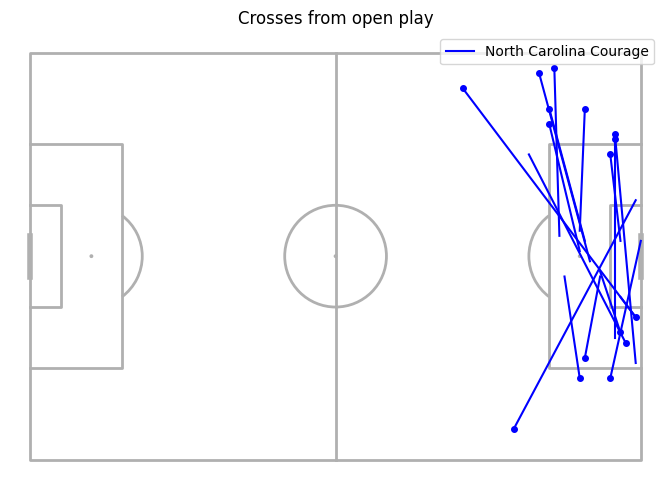

In [55]:
teams = df_passes['possession_team.name'].unique()
colors = ['blue', 'red']

fig, ax = pitch.draw(figsize=(8,5))

team1_df = df_passes[df_passes['possession_team.name'] == teams[0]]
ax.plot((team1_df['xstart'], team1_df['xend']), (team1_df['ystart'], team1_df['yend']), color = colors[0])
ax.plot(team1_df['xstart'], team1_df['ystart'], 'o', color = colors[0], markersize = 4)
ax.set_title("Crosses from open play")

#team2_df = df_passes[df_passes['possession_team.name'] == teams[1]]
#ax.plot((team2_df['xstart'], team2_df['xend']), (team2_df['ystart'], team2_df['yend']), color = colors[1])

ax.plot([], [], color=colors[0], label=teams[0])
#ax.plot([], [], color=colors[1], label=teams[1])

ax.legend()
plt.show()

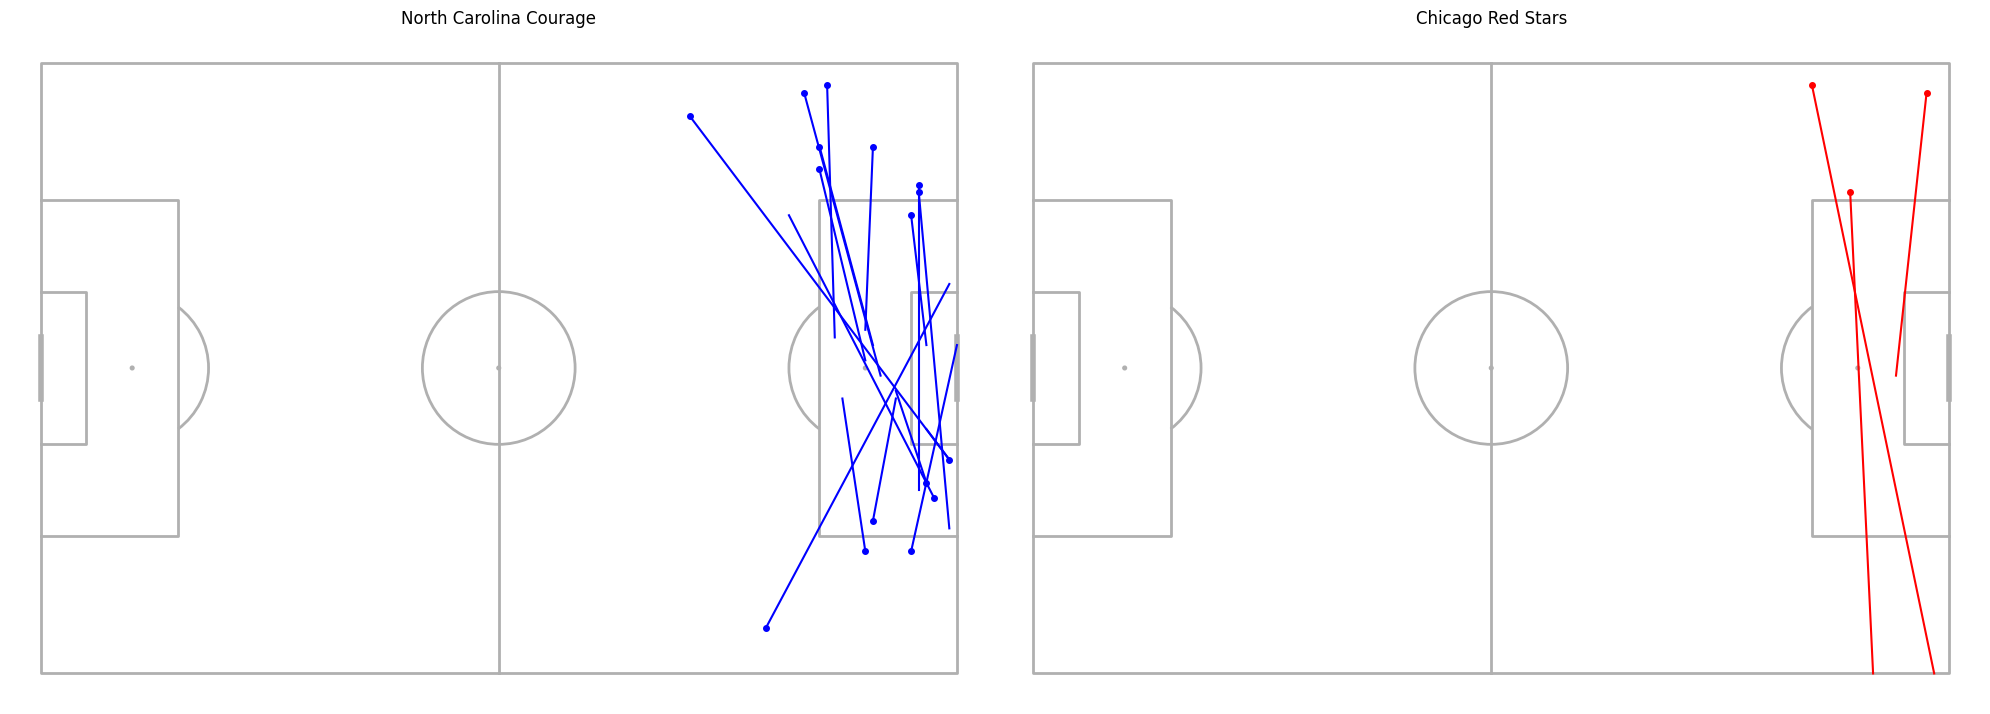

In [56]:
teams = df_passes['possession_team.name'].unique()
colors = ['blue', 'red']

# Create figure with 2 StatsBomb pitches
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Create pitch on first subplot
pitch1 = Pitch(pitch_type='statsbomb')
pitch1.draw(ax=axs[0])

# Team 1 data on first pitch
team1_df = df_passes[df_passes['possession_team.name'] == teams[0]]
axs[0].plot((team1_df['xstart'], team1_df['xend']), (team1_df['ystart'], team1_df['yend']), color=colors[0])
axs[0].plot(team1_df['xstart'], team1_df['ystart'], 'o', color=colors[0], markersize=4)
axs[0].set_title(teams[0])

# Create pitch on second subplot
pitch2 = Pitch(pitch_type='statsbomb')
pitch2.draw(ax=axs[1])

# Team 2 data on second pitch
team2_df = df_passes[df_passes['possession_team.name'] == teams[1]]
axs[1].plot((team2_df['xstart'], team2_df['xend']), (team2_df['ystart'], team2_df['yend']), color=colors[1])
axs[1].plot(team2_df['xstart'], team2_df['ystart'], 'o', color=colors[1], markersize=4)
axs[1].set_title(teams[1])

plt.tight_layout()
plt.show()